# Ayiti Analytics Data Processing Bootcamp
  Ayiti Analytics Data wants to expand its training centers throughout all the communes of the country. Your role as a data analyst is to help them realize this dream.

Its objective is to know which three communes of the country will be the most likely to expand its training centers.

Knowing that each cohort must have 30 students
 
* How many applications must be made to select 25% women for each on average

* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection
 
* What is the average number of university students who should participate in this program
* What will be the average number of applications per week that we could have
* How many weeks should we extend the application process to select 60 students per commune?
* If we were to do all the bootcamp online, who would be the best communes and how many applications would we need to select 30 student and what percentage of students would have a laptop, an internet connection, both at the same time
* What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a women to be susceptible to selection

### NB 
Use the same framework of the BA project to complete this project


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
pd1=pd.read_excel("commune.xlsx")
pd2=pd.read_csv("enroll.csv")
pd3=pd.read_csv("industry.csv")
pd4=pd.read_csv("ord.csv")
pd5=pd.read_csv("quest.csv")
pd6=pd.read_csv("study_domain.csv")
pd7=pd.read_csv("technology.csv")
pd8=pd.read_csv("transaction.csv")

In [ ]:
#Commune data Visulisation (5rows)

In [33]:
pd1.head()

,Commune_en,Commune_FR,Commune_Id,Departement,ADM1_PCODE
0,Abricots,Abricots,HT0812,Grande'Anse,HT08
1,Acul du Nord,Acul du Nord,HT0321,North,HT03
2,Anse-a-Foleur,Anse-à-Foleur,HT0922,North-West,HT09
3,Anse-a-Pitre,Anse-à-Pître,HT0234,South-East,HT02
4,Anse-a-Veau,Anse-à-Veau,HT1021,Nippes,HT10


In [50]:
#show if it have (Column NULL VALUE)
pd1.isna().sum()

Commune_en     0
Commune_FR     0
Commune_Id     0
Departement    0
ADM1_PCODE     0
dtype: int64

In [52]:
#Quantity ROWS and COLUMNS
pd1.shape

(140, 5)

In [40]:
#enroll data Visulisation Info
pd2.head()

,Unnamed: 0,created_at,expiry_date,user_id,course_name,course_id,percentage_completed,completed_at,expired,is_free_trial,completed,started_at,activated_at,updated_at,quest_id
0,0,2020-12-12T06:41:29.844Z,NaN,29816173,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-12T06:41:29.844Z,NaN
1,1,2020-12-13T14:41:17.720Z,NaN,35229766,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-13T14:41:17.720Z,NaN
2,2,2020-12-15T00:53:06.499Z,NaN,31987560,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-15T00:53:06.499Z,NaN
3,3,2020-12-18T18:38:55.683Z,NaN,35616451,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-18T18:38:55.683Z,NaN
4,4,2020-12-21T14:45:06.528Z,NaN,35390649,Entwodiksyon Nan Syans Done,1047613,0.0,NaN,False,True,False,NaN,NaN,2020-12-21T14:45:06.528Z,NaN


In [45]:
pd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            148 non-null    int64  
 1   created_at            148 non-null    object 
 2   expiry_date           60 non-null     object 
 3   user_id               148 non-null    int64  
 4   course_name           148 non-null    object 
 5   course_id             148 non-null    int64  
 6   percentage_completed  148 non-null    float64
 7   completed_at          0 non-null      float64
 8   expired               148 non-null    bool   
 9   is_free_trial         148 non-null    bool   
 10  completed             148 non-null    bool   
 11  started_at            135 non-null    object 
 12  activated_at          77 non-null     object 
 13  updated_at            148 non-null    object 
 14  quest_id              102 non-null    object 
dtypes: bool(3), float64(2),

In [44]:
#industry data Visulisation Info
pd3.head()

,Unnamed: 0,key,values,quest_id
0,0,item1,Finance,905ddcf2-ce95-11eb-9a92-7c67a234f601
1,1,item6,Technology (Software/ Internet),905e2608-ce95-11eb-809f-7c67a234f601
2,2,item5,Education,905e2608-ce95-11eb-809f-7c67a234f601
3,3,item3,Consulting,905e2608-ce95-11eb-809f-7c67a234f601
4,4,item7,Energy,905e2608-ce95-11eb-809f-7c67a234f601


In [46]:
pd3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  807 non-null    int64 
 1   key         807 non-null    object
 2   values      807 non-null    object
 3   quest_id    807 non-null    object
dtypes: int64(1), object(3)
memory usage: 25.3+ KB


In [48]:
#ord show
pd4.head()

,Unnamed: 0,created_at,user_id,product_name,product_id,amount_dollars,amount_cents,subscription,coupon_code,coupon_id,affiliate_referral_code,status,quest_id
0,0,2021-03-14T15:34:35.014Z,41587952,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906b3c86-ce95-11eb-b6a7-7c67a234f601
1,1,2021-03-14T04:20:23.483Z,41564742,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906636cf-ce95-11eb-8679-7c67a234f601
2,2,2021-03-12T19:29:22.832Z,41501853,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,906968f5-ce95-11eb-9e1a-7c67a234f601
3,3,2021-03-12T14:23:11.154Z,40284930,Entwodiksyon Nan Syans Done,1100636,0,0,False,impact_hub_coupon,6658457.0,NaN,Complete,9060477c-ce95-11eb-ace3-7c67a234f601
4,4,2021-03-11T16:01:17.901Z,40281483,Entwodiksyon Nan Syans Done,1100636,20,2000,False,NaN,NaN,NaN,Complete,9064ff29-ce95-11eb-a3d3-7c67a234f601


In [49]:
#quest Data Visual.....
pd5.head()

,Unnamed: 0,gender,dob,commune,created_at,modified_at,department,education_level,university,study_domain,current_employed,formal_sector_job,have_computer_home,internet_at_home,hear_AA_1,after_AA,quest_id
0,0,male,25/08/1998,ht0111,2021-02-14T23:03:52.768400Z,2021-02-14T23:03:52.768462Z,NaN,unknown,unknown,[],unknown,unknown,unknown,unknown,unknown,unknown,905dc006-ce95-11eb-b2f9-7c67a234f601
1,1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],No,unknown,Yes,Yes,Friend,Finding a job/internship,905ddcf2-ce95-11eb-9a92-7c67a234f601
2,2,male,17/05/1996,ht0111,2021-02-16T16:56:30.579504Z,2021-02-16T16:56:30.579563Z,ht01,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),[],No,unknown,Yes,Yes,Friend,Improving my data analysis skills,905e2608-ce95-11eb-809f-7c67a234f601
3,3,male,24/11/1996,ht0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",No,unknown,Yes,Yes,ESIH,Improving my data analysis skills,905e4cf5-ce95-11eb-96a9-7c67a234f601
4,4,male,20/07/1997,ht0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,ht01,High School (16 years),unknown,['other'],No,unknown,Yes,Yes,WhatsApp,Mentorship,905e73fd-ce95-11eb-a7b0-7c67a234f601


In [54]:
#Quantity ROWS and COLUMNS
pd5.shap

(250, 17)

In [57]:
#Quantity ROWS and COLUMNS (Study_domain)
pd6.shape


(287, 4)

In [58]:
#Data Visual....(5rowa)
pd6.head(

,Unnamed: 0,key,values,quest_id
0,0,other,other,905ddcf2-ce95-11eb-9a92-7c67a234f601
1,1,item1,Computer Science,905e4cf5-ce95-11eb-96a9-7c67a234f601
2,2,item6,Management,905e4cf5-ce95-11eb-96a9-7c67a234f601
3,3,other,other,905e73fd-ce95-11eb-a7b0-7c67a234f601
4,4,other,other,905e9b27-ce95-11eb-9c37-7c67a234f601


In [76]:
#Merge quest_ID
resultat0=pd.merge(left=pd5, right=pd2[["user_id","percentage_completed",'quest_id']], how = 'left',on='quest_id')
resultat10=pd.merge(left=resultat0, right=pd4, how = 'left',on='quest_id')
resultat12=pd.merge(left=resultat10, right=pd6, how = 'inner',on='quest_id')

In [61]:
resultat33.columns

Index(['Unnamed: 0_x', 'gender', 'dob', 'commune', 'created_at_x',
       'modified_at', 'department', 'education_level', 'university',
       'study_domain', 'current_employed', 'formal_sector_job',
       'have_computer_home', 'internet_at_home', 'hear_AA_1', 'after_AA',
       'quest_id', 'user_id_x', 'percentage_completed', 'Unnamed: 0_y',
       'created_at_y', 'user_id_y', 'product_name', 'product_id',
       'amount_dollars', 'amount_cents', 'subscription', 'coupon_code',
       'coupon_id', 'affiliate_referral_code', 'status', 'Unnamed: 0_x',
       'key_x', 'values_x', 'Unnamed: 0_y', 'key_y', 'values_y'],
      dtype='object')

In [35]:
pd1.rename(columns = {"Commune_Id": "commune"}, inplace = True)

In [36]:
pd1["commune"] = pd1["commune"].str.lower()

In [78]:
resultat13=pd.merge(left=resultat12, right=pd1[["Commune_FR","Departement","commune"]], how = 'inner',on='commune')

In [79]:
resultat13

,Unnamed: 0_x,gender,dob,commune,created_at_x,modified_at,department,education_level,university,study_domain,...,subscription,coupon_code,coupon_id,affiliate_referral_code,status,Unnamed: 0,key,values,Commune_FR,Departement
0,1,female,29/09/1996,ht0111,2021-02-16T16:01:10.861844Z,2021-02-16T16:01:10.861899Z,ht01,Bachelors (bacc +4),other,['other'],...,NaN,NaN,NaN,NaN,NaN,0,other,other,Port-au-Prince,West
1,3,male,24/11/1996,ht0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,NaN,NaN,NaN,NaN,NaN,1,item1,Computer Science,Port-au-Prince,West
2,3,male,24/11/1996,ht0111,2021-02-16T16:57:55.754541Z,2021-02-16T16:57:55.754582Z,ht01,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item1', 'item6']",...,NaN,NaN,NaN,NaN,NaN,2,item6,Management,Port-au-Prince,West
3,4,male,20/07/1997,ht0111,2021-02-16T17:05:40.907948Z,2021-02-16T17:05:40.907982Z,ht01,High School (16 years),unknown,['other'],...,NaN,NaN,NaN,NaN,NaN,3,other,other,Port-au-Prince,West
4,5,male,03/12/1996,ht0111,2021-02-16T18:35:14.430837Z,2021-02-16T18:35:14.430873Z,ht01,Other,unknown,['other'],...,NaN,NaN,NaN,NaN,NaN,4,other,other,Port-au-Prince,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,245,male,15/02/1994,ht0621,2021-03-02T18:39:19.873194Z,2021-03-02T18:39:19.873237Z,ht06,Bachelors (bacc +4),other,['other'],...,NaN,NaN,NaN,NaN,NaN,282,other,other,Mirebalais,Centre
283,246,male,08/10/1990,ht0621,2021-03-10T04:12:49.436154Z,2021-03-10T04:12:49.436213Z,ht06,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item8'],...,NaN,NaN,NaN,NaN,NaN,283,item8,Medicine,Mirebalais,Centre
284,247,male,28/12/1993,ht0621,2021-03-14T15:29:32.474015Z,2021-03-14T15:29:32.474055Z,ht06,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,['item2'],...,False,NaN,NaN,NaN,Complete,284,item2,Statistics,Mirebalais,Centre
285,248,male,17/04/1992,ht0412,2021-03-08T16:35:07.806100Z,2021-03-08T16:35:07.806161Z,ht04,Bachelors (bacc +4),other,['item1'],...,NaN,NaN,NaN,NaN,NaN,285,item1,Computer Science,Ferrier,North-East


In [104]:
def generate_barchart(data=resultat13, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,10)):
  
  """ function who generate barchart"""
  
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

In [120]:
def prob_category(data,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title=""):
  res1 = data[col].value_counts().to_frame()
  res1.columns = [abs_value]

  res2 = data[col].value_counts(normalize=True).to_frame()
  res2.columns = [rel_value]
  if  not show_plot:
    return pd.concat([res1,res2],axis=1)
  else:
    result = pd.concat([res1,res2],axis=1)
    generate_barchart(data=result.head(), title =title,abs_value =abs_value,rel_value=rel_value,figsize =(20,8))
    return result

In [121]:
def prob_category1(data,col="Pclass_letter", abs_value ="Total",rel_value ="Percent",show_plot=False, title=""):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(10,6))
     return result

def generate_barchart1(data=None, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,6)):
  
  """ Function who generate  a barchat for  cateorigal variable"""

  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  color ="White"
  for tot, perc in zip(data[abs_value],data[rel_value]):
    if tot/2 <= 50:
      tot=100
      color ="gray"

    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color=color,fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

Question:
Ayiti Analytics objective is to know which three communes of the country will be the most likely to expand its training centers.

In [88]:
#number of applicants by Commune
enscription_by_commune= resultat13.Commune_FR.value_counts(normalize=False).to_frame()
enscription_by_commune.rename(columns={"Commune_FR": "Total"},inplace=True)
#applicants by "commune" and "Amount_Payed"
Total_Pay_By_Commune =resultat13.groupby(by=["Commune_FR"]).amount_dollars.sum().to_frame()
Total_Pay_By_Commune.rename(columns={"amount_dollars": "Total Pay"},inplace=True)
Total_Pay_By_Commune.sort_values(by=['Total Pay'],  ascending=False, inplace=True)
# pay by commune
Percent_pay_by_Commune = Total_Pay_By_Commune =resultat13.groupby(by=["Commune_FR"]).amount_dollars.sum().to_frame()/resultat13.shape[0]
Percent_pay_by_Commune.rename(columns={"amount_dollars": "Percent_Pay"},inplace=True)
Percent_pay_by_Commune.sort_values(by=['Percent_Pay'],  ascending=False, inplace=True)
Valid_Commune= pd.concat([Percent_pay_by_Commune,enscription_by_commune],axis=1)
print(Valid_Commune)


                                Percent_Pay  Total
Delmas                             0.278746     79
Port-au-Prince                     0.209059     71
Jacmel                             0.209059      5
Verrettes                          0.139373      4
Croix-Des-Bouquets                 0.069686     11
Mirebalais                         0.069686      3
Saint-Marc                         0.000000      4
Saint-Louis du Nord                0.000000      1
Sainte Suzanne                     0.000000      1
Pétion-Ville                       0.000000     29
Léogâne                            0.000000      2
Port-Salut                         0.000000      1
Plaine du Nord                     0.000000      1
Petite Rivière de l'Artibonite     0.000000      1
Petite Rivière de Nippes           0.000000      1
Petit-Goâve                        0.000000      1
Tabarre                            0.000000     15
Ouanaminthe                        0.000000      3
Mombin Crochu                  

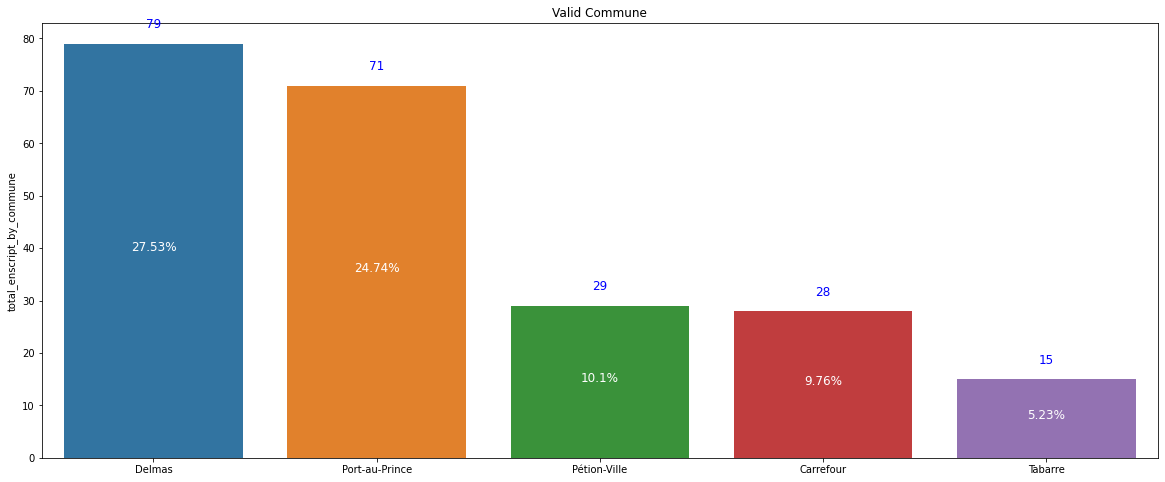

 choose to open theirs training centers in the tree most important commune :Delmas, Port-au-Prince, Petion-ville


In [122]:
result6 = prob_category(data=resultat13,col="Commune_FR",abs_value="total_enscript_by_commune",rel_value="Percent_pay_by_Commune",show_plot=True, title="Valid Commune")
print(" choose to open theirs training centers in the tree most important commune :" 
       "Delmas, Port-au-Prince, Petion-ville")

###Question:
 What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection?

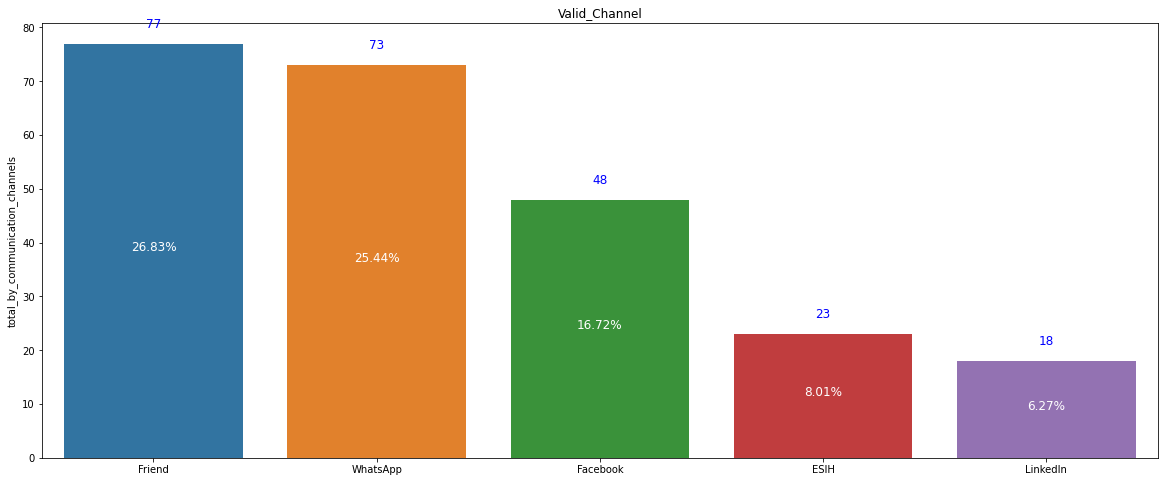

 Friend, Whatsapp, Facebook, the 3 most effective channels that will allow a student to be susceptible to selection are the three first


,total_by_communication_channels,Percent_by_communication_channels
Friend,77,0.268293
WhatsApp,73,0.254355
Facebook,48,0.167247
ESIH,23,0.080139
LinkedIn,18,0.062718
Bootcamp Alumni,17,0.059233
Ayiti Analytics Website,16,0.055749
other,10,0.034843
Instagram,5,0.017422


In [123]:
# What are the most effective communication channels (Alumni, Facebook, WhatsApp, Friend ...) that will allow a student to be susceptible to selection?

#Find total applicants by Channel
total_by_communication_channels= resultat13.hear_AA_1.value_counts(normalize=False).to_frame()
total_by_communication_channels.rename(columns={"hear_AA_1": "Total"},inplace=True)
#print(total_by_communication_channels)

#Find Percent Application by Channel
Percent_by_communication_channels =resultat13.hear_AA_1.value_counts(normalize=False).to_frame()/resultat13.shape[0]
Percent_by_communication_channels.rename(columns={"hear_AA_1": "Percent_by_Channel"}, inplace=True)
#print(Percent_by_communication_channels)

#Merge 2 previous table
Valid_Channel= pd.concat([Percent_by_communication_channels,total_by_communication_channels],axis=1)
#print(Valid_Channel)

#generate_barchart(data=Valid_Channel,title="Total and percent by channel", abs_value="Total",rel_value="Percent")

resultat7 = prob_category(data=resultat13,col="hear_AA_1",abs_value="total_by_communication_channels",rel_value="Percent_by_communication_channels",show_plot=True, title="Valid_Channel")
print(" Friend, Whatsapp, Facebook, the 3 most effective channels that will allow a student to be susceptible to selection are the three first")
resultat7